# svm_advanced_techniques
Tutorial from https://www.accelebrate.com/library/tutorials/machine-learning-part3. Some modifications must be made due to packages version changes.

## create data file
Step 1.2 from the tutorial.

Create `digits.csv` as a new text file with following content

```
0,0,0,0,16,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,16,0,0,0,
0,0,0,0,16,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,16,0,0,0
```

## load data from file
Step 1.2 - 1.5 from the tutorial.

[1]


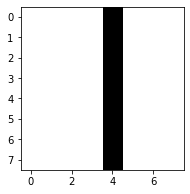

In [1]:
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import pandas as pd 

digits = datasets.load_digits()
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data, digits.target)

df = pd.read_csv('digits.csv', header=None)
sample_number = df.values[0].reshape(8,8)

result = clf.predict([[item for sublist in sample_number for item in sublist]])
print(result)

plt.figure(1, figsize=(3 ,3))
plt.imshow(sample_number, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## saving the model
Step 2.1 - 2.4 from the tutorial.

[1]


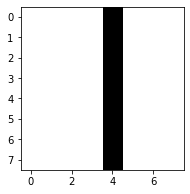

In [2]:
from sklearn import datasets, svm
#from sklearn.externals import joblib
import joblib
import matplotlib.pyplot as plt
import pandas as pd

digits = datasets.load_digits()
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data, digits.target)

df = pd.read_csv('digits.csv', header=None)
sample_number = df.values[0].reshape(8,8)

result = clf.predict([[item for sublist in sample_number for item in sublist]])
joblib.dump(clf, './digits.pkl')

print(result)

plt.figure(1, figsize=(3 ,3))
plt.imshow(sample_number, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## re-loading the model
Step 2.5 - 2.7 from the tutorial.

[1]


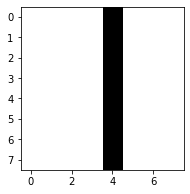

In [3]:
from sklearn import datasets, svm
#from sklearn.externals import joblib
import joblib
import matplotlib.pyplot as plt
import pandas as pd

digits = datasets.load_digits()

clf = joblib.load('digits.pkl')

df = pd.read_csv('digits.csv', header=None)
sample_number = df.values[0].reshape(8,8)

result = clf.predict([[item for sublist in sample_number for item in sublist]])

print(result)

plt.figure(1, figsize=(3 ,3))
plt.imshow(sample_number, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## optimizing the hyperparameters
Step 3.1 - 3.9 from the tutorial.

In [4]:
from sklearn import datasets, svm
#from sklearn.externals import joblib
import joblib
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

digits = datasets.load_digits()
clf = svm.SVC(kernel='rbf', random_state=101)

# both of these option arrays could be written with np.logspace
C_options = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
gamma_options = np.array([0.001, 0.01, 0.1, 0.0, 10.0, 100.0, 1000])
hyperparameter_search_space = [
    {
        'kernel': ['rbf'], 
        'C': C_options, 
        'gamma': gamma_options
    }
]

gridsearch = GridSearchCV(clf, param_grid=hyperparameter_search_space, cv=10)

gridsearch.fit(digits.data[:-1], digits.target[:-1])

cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(digits.data[-1:], digits.target[-1:])

print('Best parameter: {}'.format(str(gridsearch.best_params_)))
print('Cross-validation accuracy score: {0:0.3f}'.format(cv_performance))
print('Test accuracy score: {0:0.3f}'.format(test_performance)) 

Best parameter: {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}
Cross-validation accuracy score: 0.981
Test accuracy score: 1.000
